# **Mielage Prediction**

# **Objective**

A mileage prediction machine learning model aims to accurately estimate a vehicle's fuel efficiency based on factors like vehicle type, engine size, weight, and driving conditions. This helps users make informed decisions about vehicle selection and travel cost planning, ultimately reducing fuel expenses. Accurate predictions also promote environmentally friendly driving practices and more efficient vehicle designs. Overall, the model enhances user satisfaction, reduces costs, and supports sustainability.

# **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/MPG.csv

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
mielage = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [ ]:
mielage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mielage.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Data Preprocessing**

In [ ]:
mielage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
mielage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# **Remove Missing Values**

In [ ]:
mielage = mielage.dropna()

In [ ]:
mielage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Data Visualization**

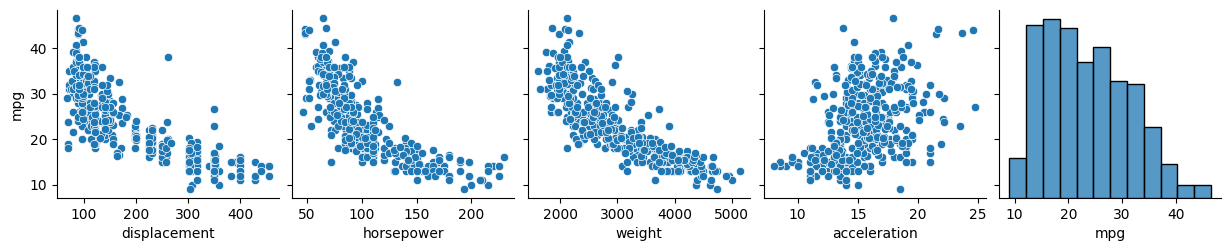

In [ ]:
sns.pairplot(mielage, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

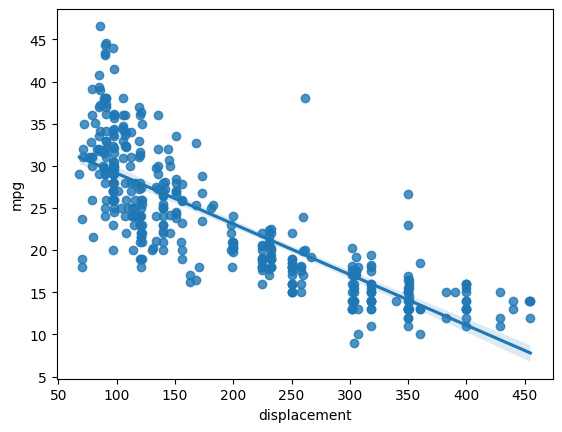

In [ ]:
sns.regplot(x='displacement', y='mpg', data=mielage)

# **Define Taget Variable (y) and Feature Variables (X)**

In [ ]:
mielage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = mielage['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
X = mielage[['displacement', 'horsepower', 'weight', 'acceleration']]

In [ ]:
X.shape

(392, 4)

In [ ]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Scaling data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X = ss.fit_transform(X)

In [ ]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=25)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.396287802103814

In [ ]:
lr.coef_

array([-1.30025254, -1.75811997, -4.02355833, -0.55536335])

# **Predict Test Data**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([29.61520415, 27.77274678, 26.19995436, 23.62981255, 31.17432199,
       20.27491555, 25.78430371, 24.9222409 , 13.9578378 , 28.05930298,
       32.25097788, 14.06033424, 22.71785488, 20.74175903, 15.82447108,
       21.5593925 , 28.7998826 , 18.51661233,  9.48879793, 15.3761142 ,
       25.87365792, 30.98473612, 29.86153299, 20.74001587, 29.26757069,
       12.32025513, 22.66597444, 23.29168556, 26.78440667, 26.15947468,
       26.99669881,  9.67309266, 29.84479393, 23.86498753, 23.46084963,
       28.68121707, 23.40383375, 26.47953491, 27.44244027, 24.66203412,
       18.78550412, 31.47757633, 26.51627857, 27.7576036 , 20.73561663,
       31.16719638, 31.36629046, 27.56261361, 31.54151089, 24.88739752,
        6.19730262, 20.98866792, 23.55875265, 25.80610556, 30.24511054,
       20.81130727, 23.43008505, 10.14727042, 25.67327482, 10.90016745,
       15.77197463, 24.15837464, 28.93596782, 30.68235585, 29.04575175,
       31.51788807, 22.97434896, 19.1534564 , 31.70207453, 25.32

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

3.35960981669906

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.14372653423822668

In [ ]:
r2_score(y_test, y_pred)

0.6413881895059925

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [ ]:
X_train2 = poly.fit_transform(X_train)

In [ ]:
X_test2 = poly.fit_transform(X_test)

In [ ]:
lr.fit(X_train2, y_train)

LinearRegression()

In [ ]:
lr.intercept_

21.01217253646482

In [ ]:
lr.coef_

array([-2.55553351, -5.37873429, -1.49221241, -1.36391775,  1.38306804,
        0.30001108,  0.02178768,  0.83398768, -0.50648927,  0.66528834])

In [ ]:
y_pred_poly = lr.predict(X_test2)

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred_poly)

3.0814844321205284

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12594700904257164

In [ ]:
r2_score(y_test, y_pred_poly)

0.6954694490675055

# **Explanation**


A mileage prediction machine learning model estimates a vehicle's fuel efficiency based on various factors like vehicle type, engine size, weight, and driving conditions. By learning from historical data, the model can accurately predict how many miles a vehicle can travel per gallon of fuel. This helps users make informed decisions about fuel costs and vehicle selection. Overall, the goal is to provide reliable fuel consumption estimates to enhance budgeting and planning.

We are using Linear Regression and Polynomial Regression in this model